# General information

______________________

The following Jupyter notebook was created in order to derive some meaningful insights from the US Permanent Visa Application decisions. Data covers years 2012 - 2017 and includes information on employer, position, wage offered, job posting history, employee education and past visa history, associated lawyers, and final decision. It was collected and distributed by the US Department of Labor. 

According to Kaggle's dataset context, a permanent labor certification issued by the Department of Labor (DOL) allows an employer to hire a foreign worker to work permanently in the United States. In most instances, before the U.S. employer can submit an immigration petition to the Department of Homeland Security's U.S. Citizenship and Immigration Services (USCIS), the employer must obtain a certified labor certification application from the DOL's Employment and Training Administration (ETA). The DOL must certify to the USCIS that there are not sufficient U.S. workers able, willing, qualified and available to accept the job opportunity in the area of intended employment and that employment of the foreign worker will not adversely affect the wages and working conditions of similarly employed U.S. workers.

The goal of the below data analysis is checking the general trend in Visa applications, the most popular citizenships, employers, cities and finally, predicting the application decision based on the chosen features. 

# Importing necessary packages

_____________________--

In [1]:
# Basic modules for dataframe manipulation
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Cross Validaton
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Exploration of the dataset

__________________________--

Reading the raw data from the "us_perm_visas.csv" file available within Kaggle's datasets into a dataframe

In [2]:
# Decision_date and case_recieved_date are read as dates
df = pd.read_csv('us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'])

Let's take a look at the structure of our dataset by checking the number of observations, columns and displaying 10 first and last rows.

In [3]:
# Displaying number of rows and columns
print('Number of Visa Applications:', len(df))
print('Number of Columns:', len(df.columns))

Number of Visa Applications: 374362
Number of Columns: 154


In [4]:
# Change the default number of columns displayed by DataFrame's head method
pd.set_option('display.max_columns', 85)

# Displaying 5 first rows
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,employer_city,employer_country,employer_decl_info_title,employer_name,employer_num_employees,employer_phone,employer_phone_ext,employer_postal_code,employer_state,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,foreign_worker_info_education_other,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_postal_code,foreign_worker_info_rel_occup_exp,foreign_worker_info_req_experience,foreign_worker_info_state,foreign_worker_info_training_comp,foreign_worker_ownership_interest,foreign_worker_yr_rel_edu_completed,fw_info_alt_edu_experience,fw_info_birth_country,fw_info_education_other,...,recr_info_on_campus_recr_to,recr_info_pro_org_advert_from,recr_info_pro_org_advert_to,recr_info_prof_org_advert_from,recr_info_prof_org_advert_to,recr_info_professional_occ,recr_info_radio_tv_ad_from,recr_info_radio_tv_ad_to,recr_info_second_ad_start,recr_info_sunday_newspaper,recr_info_swa_job_order_end,recr_info_swa_job_order_start,refile,ri_1st_ad_newspaper_name,ri_2nd_ad_newspaper_name,ri_2nd_ad_newspaper_or_journal,ri_campus_placement_from,ri_campus_placement_to,ri_coll_tch_basic_process,ri_coll_teach_pro_jnl,ri_coll_teach_select_date,ri_employee_referral_prog_from,ri_employee_referral_prog_to,ri_employer_web_post_from,ri_employer_web_post_to,ri_job_search_website_from,ri_job_search_website_to,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,NEW YORK,NaN,NaN,NETSOFT USA INC.,NaN,NaN,NaN,10010.0,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,NaN,POLAND,2011-12-21,200 BROAD STREET,NaN,CARLSTADT,NaN,NaN,PINNACLE ENVIRONEMNTAL CORP,NaN,NaN,NaN,7072.0,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,NaN,INDIA,2011-12-01,1054 TECHNOLOGY PARK DRIVE,NaN,GLEN ALLEN,NaN,NaN,"SCHNABEL ENGINEERING, INC.",NaN,NaN,NaN,23059.0,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,NaN,SOUTH KOREA,2011-12-01,33-17 PRINCE ST. 2ND FL,NaN,FLUSHING,NaN,NaN,EBENEZER MISSION CHURCH,NaN,NaN,NaN,11354.0,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,NaN,CANADA,2012-01-26,1373 BROADWAY,NaN,ALBANY,NaN,NaN,ALBANY INTERNATIONAL CORP.,NaN,NaN,NaN,12204.0,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,N

In [5]:
# Displaying 5 last rows
df.tail()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,employer_city,employer_country,employer_decl_info_title,employer_name,employer_num_employees,employer_phone,employer_phone_ext,employer_postal_code,employer_state,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,foreign_worker_info_education_other,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_postal_code,foreign_worker_info_rel_occup_exp,foreign_worker_info_req_experience,foreign_worker_info_state,foreign_worker_info_training_comp,foreign_worker_ownership_interest,foreign_worker_yr_rel_edu_completed,fw_info_alt_edu_experience,fw_info_birth_country,fw_info_education_other,...,recr_info_on_campus_recr_to,recr_info_pro_org_advert_from,recr_info_pro_org_advert_to,recr_info_prof_org_advert_from,recr_info_prof_org_advert_to,recr_info_professional_occ,recr_info_radio_tv_ad_from,recr_info_radio_tv_ad_to,recr_info_second_ad_start,recr_info_sunday_newspaper,recr_info_swa_job_order_end,recr_info_swa_job_order_start,refile,ri_1st_ad_newspaper_name,ri_2nd_ad_newspaper_name,ri_2nd_ad_newspaper_or_journal,ri_campus_placement_from,ri_campus_placement_to,ri_coll_tch_basic_process,ri_coll_teach_pro_jnl,ri_coll_teach_select_date,ri_employee_referral_prog_from,ri_employee_referral_prog_to,ri_employer_web_post_from,ri_employer_web_post_to,ri_job_search_website_from,ri_job_search_website_to,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,SOUTH KOREA,NaN,2016-12-30,434 S EUCLID STREET STE 100,None,ANAHEIM,UNITED STATES OF AMERICA,President,"UNION DENTAL GROUP ANAHEIM, INC.",3.0,7145330900,NaN,92802,CA,2014.0,NaN,NaN,SIHEUNG-SI,Associate's,NaN,YOUNGSAN UNIVERSITY,ENGLISH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,SOUTH KOREA,None,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2016-10-30,Y,2016-11-19,2016-10-19,N,Orange County Register,Orange County Register,Y,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,Y,NaN,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,VIETNAM,NaN,2016-12-30,ONE MICROSOFT WAY,None,REDMOND,UNITED STATES OF AMERICA,Microsoft In-House Attorney,MICROSOFT CORPORATION,63000.0,425-538-3872,NaN,98052,WA,1975.0,NaN,NaN,QUINCY,Bachelor's,NaN,HO CHI MINH CITY UNIVERSITY OF NATURAL SCIENCES,INFORMATION TECHNOLOGY,NaN,NaN,NaN,MA,NaN,NaN,NaN,Y,VIETNAM,None,...,NaN,NaN,NaN,2016-09-01,2016-09-01,Y,NaN,NaN,2016-07-31,Y,2016-08-30,2016-07-26,N,The Boston Globe,The Boston Globe,Y,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,2016-07-27,2016-08-05,Y,2016-07-27,2016-07-27,Y,NaN,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,INDIA,NaN,2016-12-30,220 W MICHIGAN AVE,None,YPSILANTI,UNITED STATES OF AMERICA,Director,AMPHION GLOBAL INC,33.0,6143568160,NaN,48197,MI,2010.0,NaN,NaN,DEARBORN,Master's,NaN,CLEVELAND STATE UNIVERSITY,ELECTRICAL AND ELECTRONICS ENGINEERING,NaN,NaN,NaN,MI,NaN,NaN,NaN,A,INDIA,None,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,2016-07-31,Y,2016-08-22,2016-07-18,N,Detroit Free Press,Detroit Free Press,Y,NaN,NaN,NaN,None,NaN,NaN,NaN,2016-07-18,2016-08-16,2016-07-19,2016-08-16,N,2016-07-21,2016-07-28,Y,NaN,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS

As we can see, our data set consists of 374362 applications described by 153 attributes. Since we have 2 attributes that may contain similar information - <i>case_number</i> & <i>case_no</i> - let's check their lenghts, completeness and example values.

In [6]:
print("Length of 'case_number' column is: ", len(df['case_number'])," with",df.case_number.isnull().sum(), "missing values")
print("Length of 'case_no' column is: ", len(df['case_no'])," with", df.case_no.isnull().sum(),"missing values \n")

print("First 2 values of case_number column are : \n", df['case_number'].head(2),"\n")
print("Last 2 values of case_number column are : \n", df['case_number'].tail(2), "\n")
print("First 2 values of case_no column are : \n", df['case_no'].head(2), "\n")
print("Last 2 values of case_no column are : \n", df['case_no'].tail(2))

Length of 'case_number' column is:  374362  with 135269 missing values
Length of 'case_no' column is:  374362  with 239093 missing values 

First 2 values of case_number column are : 
 0    NaN
1    NaN
Name: case_number, dtype: object 

Last 2 values of case_number column are : 
 374360    A-16357-84250
374361    A-16279-59292
Name: case_number, dtype: object 

First 2 values of case_no column are : 
 0    A-07323-97014
1    A-07332-99439
Name: case_no, dtype: object 

Last 2 values of case_no column are : 
 374360    NaN
374361    NaN
Name: case_no, dtype: object


As we supposed, these columns contain similar values and their "NaN" values add up to the total number of observations so let's create new column containing only non missing values from both "case_number" and "case_no" columns and remove them afterwards.

In [7]:
casenoindex = df.columns.get_loc("case_no")
casenumberindex = df.columns.get_loc("case_number")
casenumberlist = []

for value in df.iloc[0:135269,casenoindex]:
    casenumberlist.append(value)
    
for value in df.iloc[135269:374363,casenumberindex]:
    casenumberlist.append(value)
    
df['casenumber'] = casenumberlist
df.drop(df.columns[[casenoindex,casenumberindex]], axis=1, inplace=True)

Now, let's check the "case_status" column as it may contain information about decision made for respective Visa application and print the length of unique values it contains.

In [8]:
# Printing number of unique values for 'case_status' column
df['case_status'].value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: case_status, dtype: int64




Since our observations contain some records with status == "Withdrawn", we will remove them from our dataset and for cases where status is "Certified" or "Certified-Expired" we will use just one value " Certified" so that we will end up having only the desired values namely "Certified" and "Denied".  According to Wikipedia and other internet resources, petitioners have 6 months time to file I-140 form after receiving the status of "Certified" before it expires and turns to "Certified-Expired" status.

Form I-140, Immigrant Petition for Alien Worker is a form submitted to the United States Citizenship and Immigration Services (USCIS) by a prospective employer to petition an alien to work in the US on a permanent basis. This is done in the case when the worker is deemed extraordinary in some sense or when qualified workers do not exist in the US.

In [9]:
# Removing all withdrawn applications
df = df[df.case_status != 'Withdrawn']

# Combining certified-expired and certified applications and displaying distribution of "case_status" variable
df.loc[df.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
df.case_status.value_counts()

Certified    330519
Denied        25649
Name: case_status, dtype: int64

It's interesting that only 7.2% of Visa applications were denied. This means that we are dealing with highly imbalanced dataset hence stratified Cross Validation will be required in order to train models in a correct fashion.  Now, let's perform dimensionality reduction by removing rows and columns containing only 'NaN' values and check the dataframe's shape.

In [10]:
# Dropping all empty columns
df = df.dropna(axis=1, how='all');

# Dropping all empty rows
df = df.dropna(axis=0, how='all');

df.shape

(356168, 153)

It looks like there are neither rows nor columns containing only 'NaN' values so let's check how many columns contains any missing values.

In [11]:
# Importing 'percent_missing' function from helper module to calculate the percentage of missing values across columns
from helper import percent_missing

missing = percent_missing(df, quantity = 50)

In [12]:
missing.head(20)

,Missing Ratio
orig_file_date,99.925878
orig_case_no,99.922508
recr_info_job_fair_to,99.517924
recr_info_job_fair_from,99.516801
recr_info_on_campus_recr_to,99.506413
recr_info_on_campus_recr_from,99.504447
ji_live_in_dom_svc_contract,99.350587
foreign_worker_info_education_other,98.947968
job_info_training_field,98.795231
job_info_training_num_months,98.716336


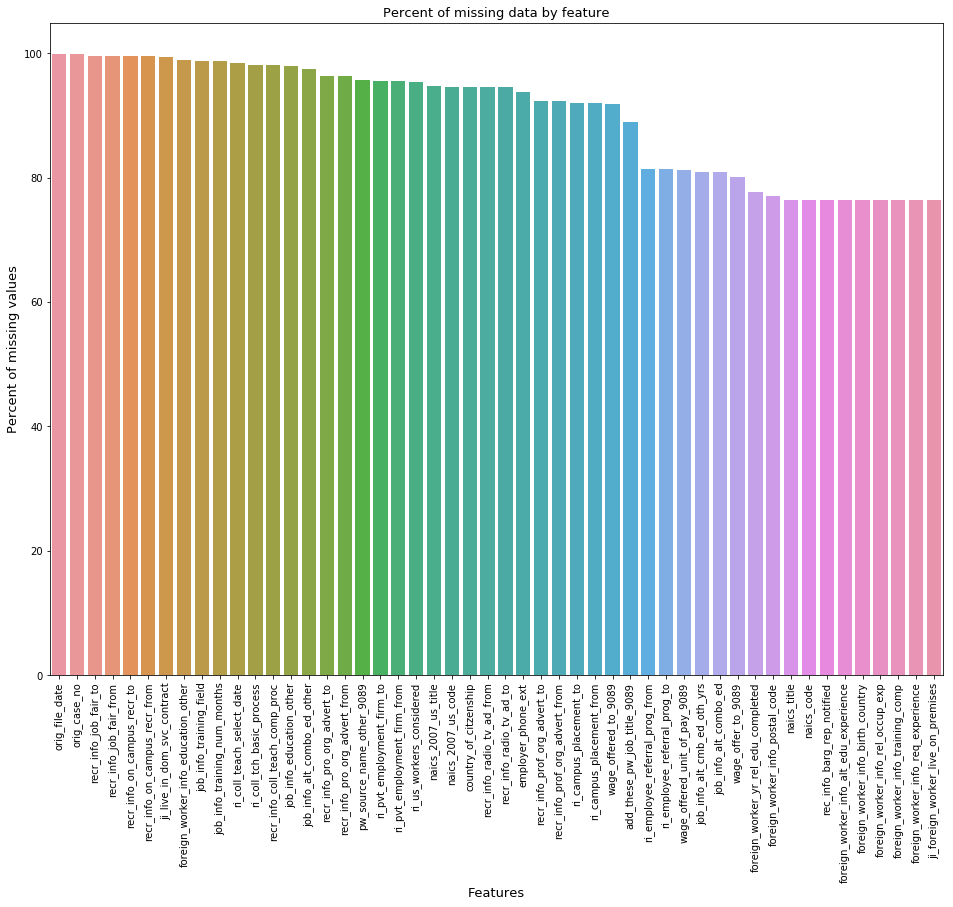

In [13]:
# Importing 'plot_bar' function from helper module to plot the distribution of missing data across features
from helper import plot_bar

plot_bar(x = missing.index, y = missing['Missing Ratio'].values, xlabel = 'Features', ylabel = 'Percent of missing values', title = 'Percent of missing data by feature', figsize = (16,12))

## Visualization of the unprocessed data

Before removing columns which consist mostly of missing values, let's create a new column containing only the year of Visa application submission and perform some visualisation in order to derive initial insights .

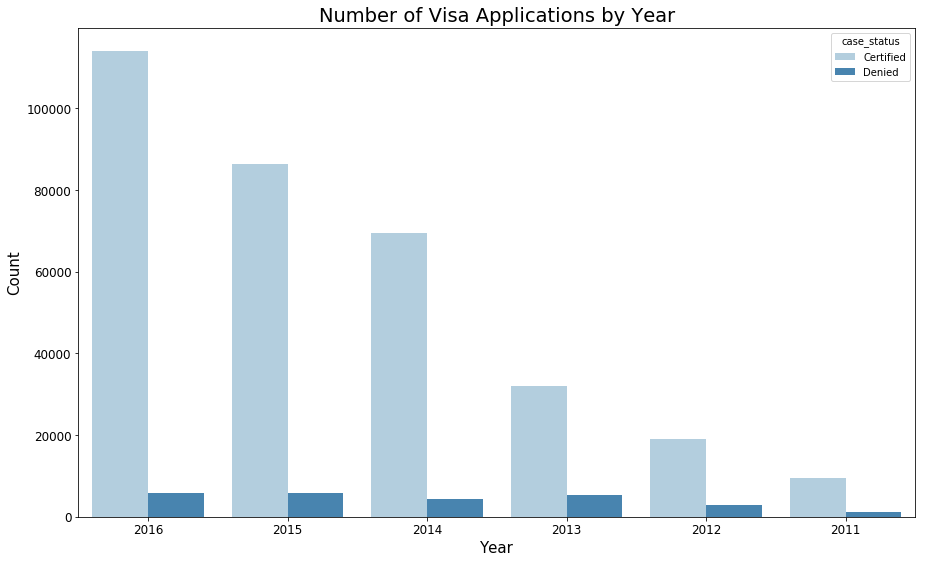

In [14]:
# Converting the date to contain just the year of application submission
df['year'] = df['decision_date'].dt.year

# Importing 'plot_counts' function from helper module which we will use to display count plots of desired features
from helper import plot_counts    

plot_counts(df, x = 'year', hue = 'case_status', figsize = (15, 9),
            xlabel = 'Year', ylabel = 'Count', title = 'Number of Visa Applications by Year', fontsize = 15)

In [15]:
df['year'].value_counts(ascending = True)

2011     10602
2012     21954
2013     37473
2014     73881
2015     92338
2016    119920
Name: year, dtype: int64

As we can observe, the number of submitted Visa applications increases every year. It's interesting that while the number of possitively considered applications increases, the number of "Denied" ones seems to be similar from year 2013. As a next step, let's see, what where the most popular cities.

In [16]:
# Displaying 15 most popular cities
df['employer_city'] = df['employer_city'].str.upper()
df['employer_city'].value_counts().head(15)

NEW YORK           17198
COLLEGE STATION    11985
SANTA CLARA        10519
SAN JOSE            9147
REDMOND             8485
MOUNTAIN VIEW       8121
HOUSTON             6720
SAN FRANCISCO       6352
SUNNYVALE           6104
PLANO               5607
CHICAGO             5561
SEATTLE             5051
EDISON              4056
LOS ANGELES         4045
SAN DIEGO           3702
Name: employer_city, dtype: int64

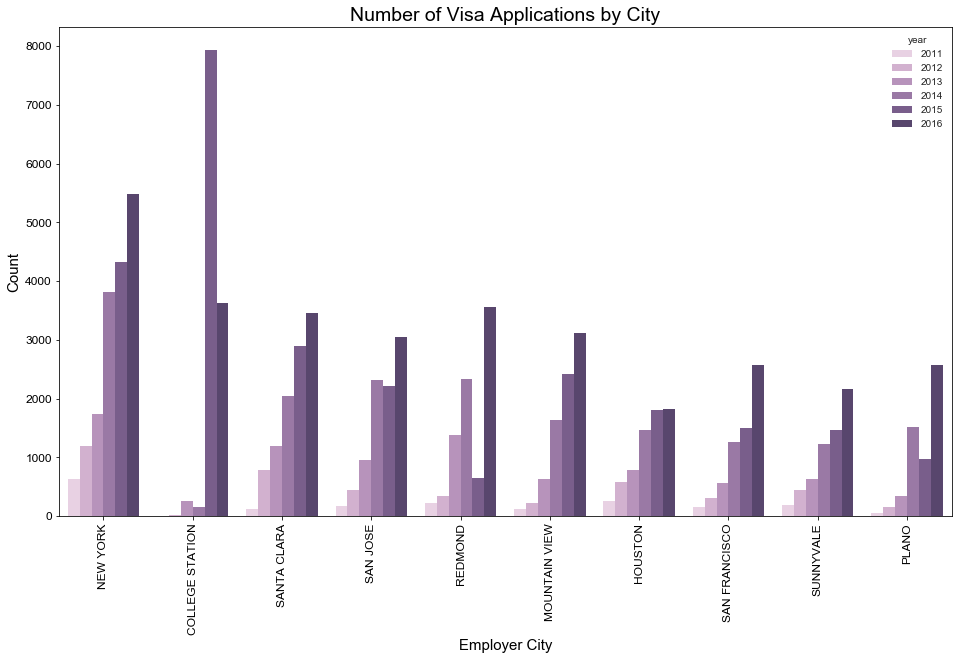

In [17]:
plot_counts(df, x = 'employer_city', hue = 'year', palette = sns.cubehelix_palette(6, start=12, dark = 0.3, rot=0.2),
            figsize = (16, 9), boundary = 10, ascending = False, xlabel = 'Employer City',
            ylabel = 'Count', title = 'Number of Visa Applications by City', rotation = 90, fontsize = 15, style = 'seaborn-whitegrid')

In the last few years, the most popular destination cities were: New York, College Station, Santa Clara, San Jose, Redmond, Mountain View, Houston, SunnyVale, San Francisco and Plano. In most of the cities there was a positive trend in Visa applications. A bizarre situation occured in College Station in 2015 where the number of submitted Visa applications was more or less twice as large as in other cities.  


Now, let's take a look what were the most hiring employers and economic sectors through these years. For <i>us_economic_sector</i> variable we have only 120 868 non-missing values, but this should give us an insight. 

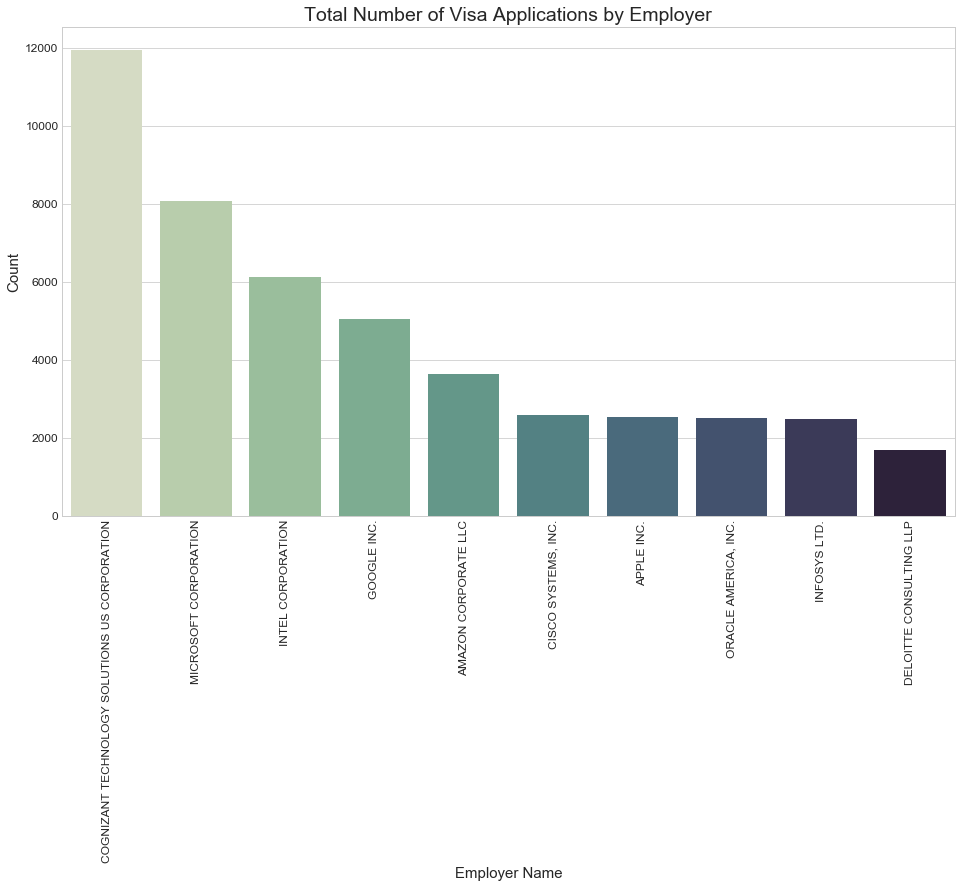

In [18]:
plot_counts(df, x = 'employer_name', palette = sns.cubehelix_palette(10, start=.5, rot=-.75),
            figsize = (16, 9), boundary = 10, ascending = False, xlabel = 'Employer Name',
            ylabel = 'Count', title ='Total Number of Visa Applications by Employer', rotation = 90, fontsize = 15, style = 'default')

As we can see, 9 out of 10 most beneficial companies for Visa applicants are IT industry representatives. This leads to the assumption that IT sector is both most favourable and demanding one in United States. Let's check what is the distribution of industries across all Visa applications.

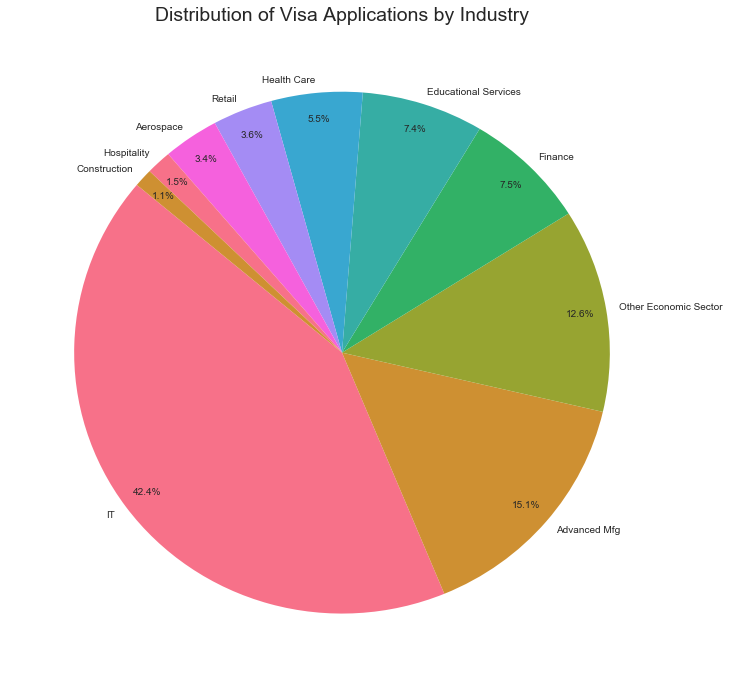

In [19]:
# Importing 'plot_pie' function from helper module which we will use to display pie chart of desired feature
from helper import plot_pie

plot_pie(df, x = 'us_economic_sector', boundary = 10, fontsize = 15,  title = 'Distribution of Visa Applications by Industry')

Even our US economic sector sample contained only 120 868 non-missing values, this somehow confirms that IT and Advanced Manufacturing are the most convenient sectors for applying foreigners. As a next step in our EDA, let's take a look at the most desired job titles, citizenships and class of admission of our Visa applicants.  

In [20]:
df['job_info_job_title'].value_counts(dropna = False)[:20]

NaN                                 126889
Software Engineer                    14372
Computer Systems Analyst - V          4747
Senior Software Engineer              3801
Computer Systems Analyst - II         3416
Software Developer                    2880
Assistant Professor                   2604
Programmer Analyst                    2534
Computer Systems Analyst - IV         2496
Systems Analyst                       2034
Software Development Engineer II      1630
Poultry Processing Worker             1594
Component Design Engineer             1064
Poultry Processor                     1037
Business Analyst                       963
software engineer                      932
SOFTWARE ENGINEER                      877
Senior Programmer Analyst              862
Sr. Software Engineer                  847
Senior Software Developer              817
Name: job_info_job_title, dtype: int64

Since our column contains job titles with different letter casing we need to standarize them so that
value_counts() method will be able to count them more accurately. Also, there are lots of same positions 
like "Computer Systems Analyst" which differ only by the number standing after hyphen so we will 
split these titles by finding the '-', 'ii' and '/' signs and leaving only the left side of the splitting 
result. Afterwards, we are going to remove leading and trailing spaces, replace "sr." with "senior" values and get rid of  'nan's.

In [21]:
# Converting values to lower case
df['job_info_job_title'] = df['job_info_job_title'].str.lower()

# Splitting job titles by hypen, forward slash or roman numbers from 2 to 4 
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split("[-|/]|(iv|i{2,3})").str[0]

# Replacing 'sr.' with 'senior'
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.', 'senior')

# Removing leading and trailing spaces
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()

# Replacing "NaN", "NaT" and "nan" values with np.nan
df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)

df['job_info_job_title'].value_counts(dropna=True)[:10]

software engineer                18624
computer systems analyst         12070
senior software engineer          5803
software developer                4515
programmer analyst                3841
assistant professor               2869
software development engineer     2766
systems analyst                   2598
senior programmer analyst         1884
senior software developer         1625
Name: job_info_job_title, dtype: int64

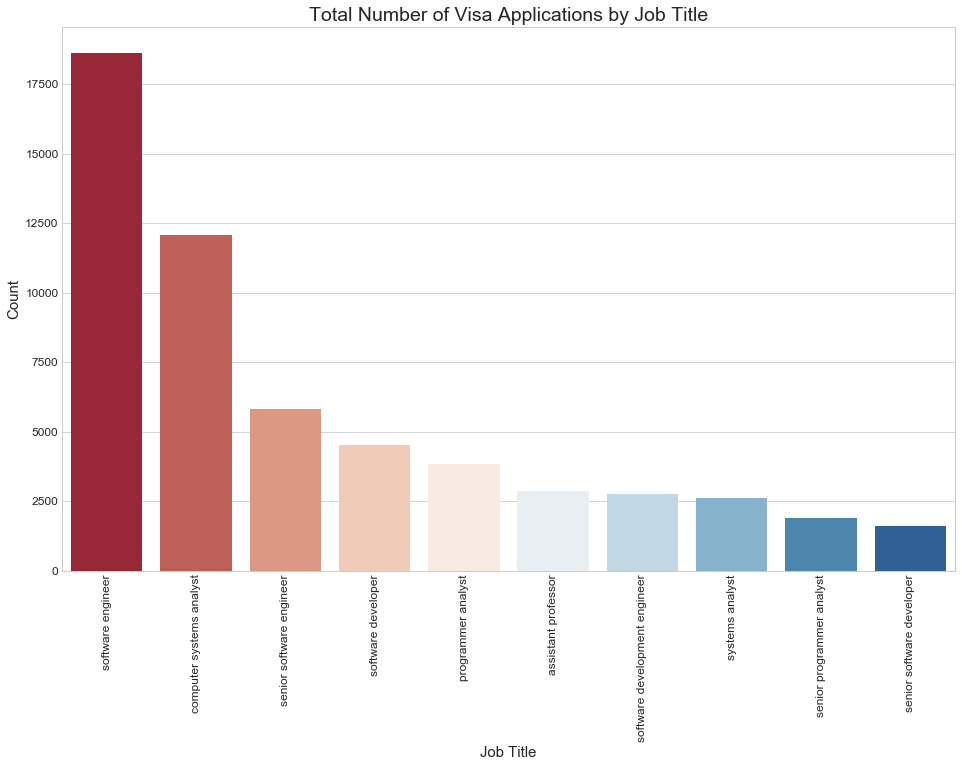

In [22]:
plot_counts(df, x = 'job_info_job_title', figsize = (16, 10), boundary = 10, ascending = False, 
            rotation = 90, fontsize = 15, palette = sns.color_palette("RdBu", n_colors=10),
            style = 'seaborn-whitegrid', xlabel = 'Job Title', ylabel = 'Count', title = 'Total Number of Visa Applications by Job Title')

Interestingely, all of the most popular positions except  "assistant professor" are derived from the IT industry. This is another confirmation that there is a huge demand for IT specialists in USA and being one of them increases our chances to obtain a permanent Visa. 

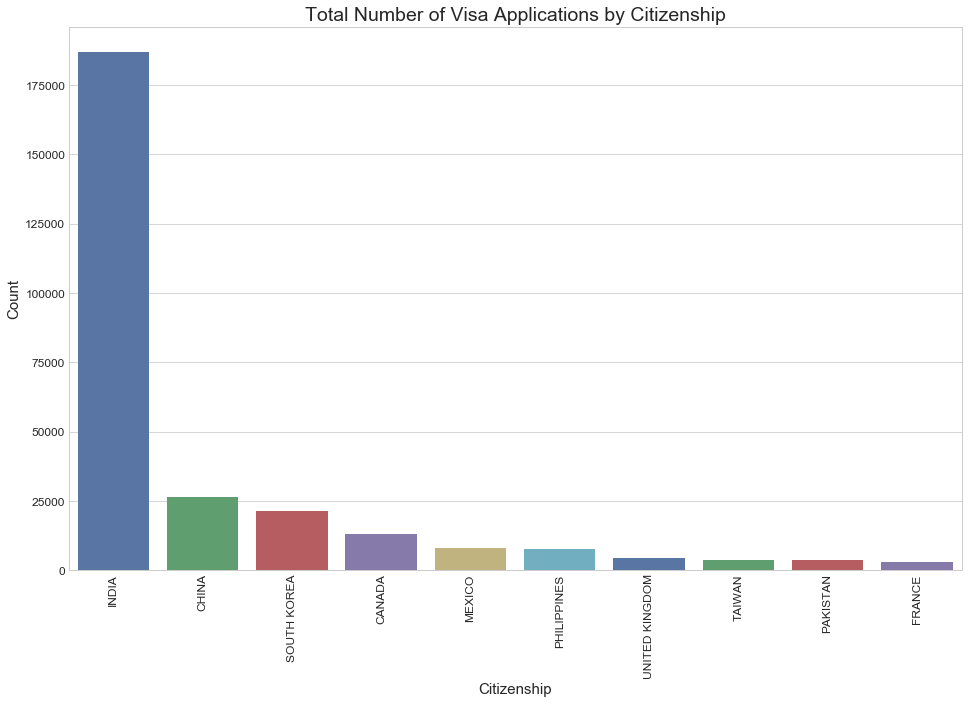

In [23]:
plot_counts(df, x = 'country_of_citizenship', figsize = (16, 10), boundary = 10, ascending = False, 
            rotation = 90, fontsize = 15, palette = sns.color_palette('deep', n_colors = 10), style = 'seaborn-whitegrid',
           xlabel = 'Citizenship', ylabel = 'Count', title = 'Total Number of Visa Applications by Citizenship')

As we can see, the majority of Visa applications has been submitted by Indian citizens. They constitute to more than half of our observations, we can assume that most of them are computer specialists. Now let's check what Visa types were the most desired ones.

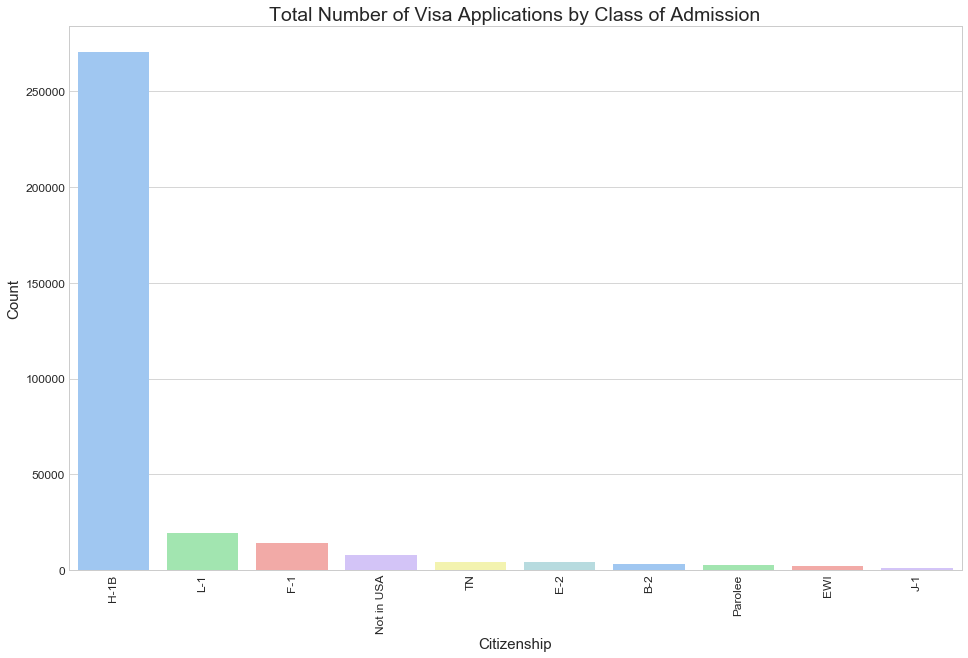

In [24]:
plot_counts(df, x = 'class_of_admission', figsize = (16, 10), boundary = 10, ascending = False, 
            rotation = 90, fontsize = 15, palette = sns.color_palette('pastel', n_colors = 10), style = 'seaborn-whitegrid',
           xlabel = 'Citizenship', ylabel = 'Count', title = 'Total Number of Visa Applications by Class of Admission' )

The vast majority of petitioners were applying for the H-1B Visa, which according to the Wikipedia, allows U.S. employers to employ foreign workers in specialty occupations. If a foreign worker in H-1B status quits or is dismissed from the sponsoring employer, the worker must either apply for and be granted a change of status, find another employer (subject to application for adjustment of status and/or change of visa), or leave the United States. 


Finally, let's check the number and kind of application types. Unfortunately, our data consists only of 126 848 non-missing values for this attribute, but this should give us a general overview.

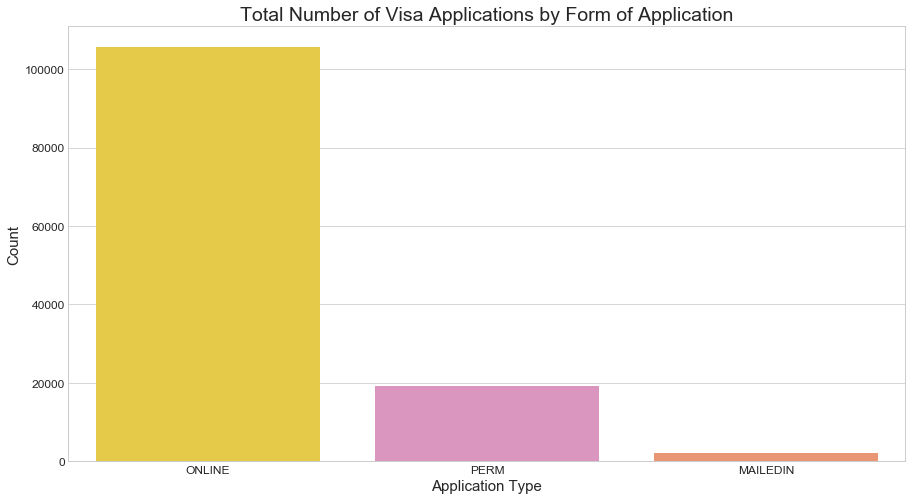

In [25]:
plot_counts(df, x = 'application_type', figsize = (15, 8), fontsize = 15, palette = sns.color_palette('Set2_r', n_colors = 3),
            style = 'seaborn-whitegrid', xlabel = 'Application Type', ylabel = 'Count', title = 'Total Number of Visa Applications by Form of Application' )

Since PERM (Program Electronic Review Management) is an online solution for petitioners it's clearly visible that applying online is more favorable for most of applying specialists than any other form. The last plotting activity will be displaying the applicants education level and remuneration.

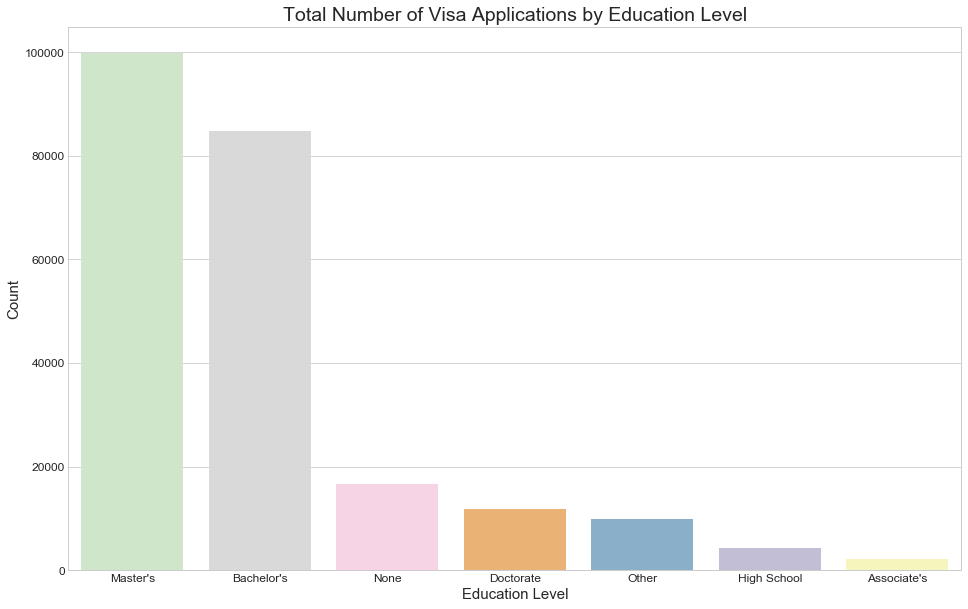

In [26]:
plot_counts(df, x = 'foreign_worker_info_education', figsize = (16, 10), ascending = False, fontsize = 15,
            palette = sns.color_palette('Set3_r', n_colors = 7), style = 'seaborn-whitegrid',
            xlabel = 'Education Level', ylabel = 'Count', title = 'Total Number of Visa Applications by Education Level')

As we can see, the vast majority of petitioners are university graduates who obtained either Master or Bachelor title. Before plotting the remuneration, we will remove commas from the values so that they are left only with decimal places denoted. Also, since some of the wages are hourly, weekly, bi-weekly and monthly values, we have to calculate the yearly equivalents for them. According to the https://www.timeanddate.com/date/workdays.html website, the average number of working days in USA is 250. We will use this information in our calculations.

In [27]:
df['pw_unit_of_pay_9089'].value_counts()

Year         328256
yr            18450
Hour           6961
hr              677
Week            175
Month           114
Bi-Weekly        22
wk               20
mth               7
bi                5
Name: pw_unit_of_pay_9089, dtype: int64

In [28]:
# Replacing commas with whitespace character
df['pw_amount_9089'] = df['pw_amount_9089'].str.replace(",","") 

# Changing format from string to float
df['pw_amount_9089'] = df.pw_amount_9089.astype(float)

for unit in df.pw_unit_of_pay_9089.unique():
    if unit == "hr" or unit == "Hour":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 8 * 250)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "wk" or unit == "Week":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 50)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "mth" or unit == "Month":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 12)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "bi" or unit == "Bi-Weekly":  
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 25)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit =="yr":
         df.loc[df['pw_unit_of_pay_9089'] == unit ,'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    else:
        continue
        
# Filling missing values with median 
df['pw_amount_9089']= df['pw_amount_9089'].fillna((df['pw_amount_9089'].median()))

In [29]:
# Since running "describe" method on "pw_amount_9089" column returned exponential values, I decided to convert them to floats so that they are easier to understand
with pd.option_context('float_format', '{:.2f}'.format): print(df.pw_amount_9089.describe())

count      356168.00
mean       469624.51
std       7679620.28
min             7.50
25%         67808.00
50%         86278.00
75%        104790.00
max     495748000.00
Name: pw_amount_9089, dtype: float64


In [30]:
# Dividing our continuous income values into some categories to facilitate their visualization
df['remuneration'] = pd.cut(df['pw_amount_9089'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
df.drop('pw_amount_9089', axis = 1, inplace = True)
salary = df['remuneration'].value_counts()
salary.iloc[np.argsort(salary.index)]

0-30k        19810
30-60k       47493
60-90k      133050
90-120k     112631
120-150k     30532
150-180k      7094
180-210k      3801
210-240k       604
240-270k        29
270k+         1123
Name: remuneration, dtype: int64

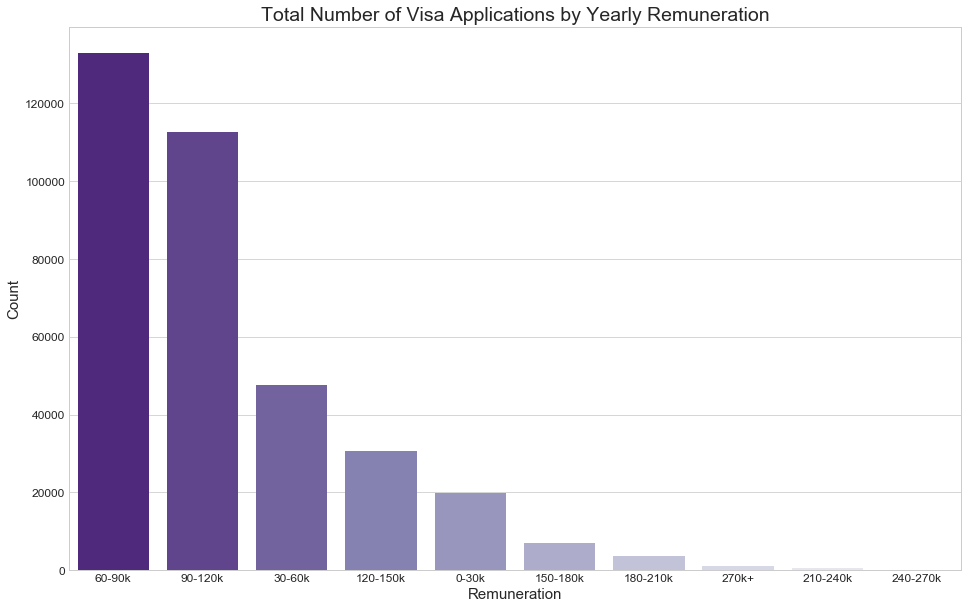

In [31]:
plot_counts(df, x = 'remuneration', figsize = (16, 10), ascending = False, fontsize = 15,
            palette = sns.color_palette('Purples_r', n_colors = 10), style = 'seaborn-whitegrid',
            xlabel = 'Remuneration', ylabel = 'Count', title = 'Total Number of Visa Applications by Yearly Remuneration')

As we can see, over 65% of the applicants earn between 60 and 120 thousand dollars yearly.

# Feature engineering, selection and data cleansing

___________________________--

In [32]:
# Leaving columns which have more than 75% non-missing observations
df = df.loc[:,df.count() >= 267000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356168 entries, 0 to 374353
Data columns (total 19 columns):
case_status               356168 non-null object
class_of_admission        335083 non-null object
country_of_citizenship    336896 non-null object
decision_date             356168 non-null datetime64[ns]
employer_address_1        356131 non-null object
employer_city             356158 non-null object
employer_name             356160 non-null object
employer_postal_code      356135 non-null object
employer_state            356131 non-null object
job_info_work_city        356073 non-null object
job_info_work_state       356072 non-null object
pw_level_9089             329583 non-null object
pw_soc_code               355778 non-null object
pw_soc_title              353847 non-null object
pw_source_name_9089       354081 non-null object
pw_unit_of_pay_9089       354687 non-null object
casenumber                356168 non-null object
year                      356168 non-null int64


Since our dataset consists of 18 features which have less than 25% of missing values , we will choose some of them for further analysis and perform imputations but before doing so, let's use add_datepart function from helper module which will create new time series related features from 'decision_date' variable.

In [33]:
# Importing 'add_datepart' function from helper module which will create new time series related features from 'decision_date' variable
from helper import add_datepart

add_datepart(df, 'decision_date')

In [34]:
df.head()

,case_status,class_of_admission,country_of_citizenship,employer_address_1,employer_city,employer_name,employer_postal_code,employer_state,job_info_work_city,job_info_work_state,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,casenumber,year,remuneration,decision_Year,decision_Month,decision_Week,decision_Day,decision_Dayofweek,decision_Dayofyear,decision_Is_month_end,decision_Is_month_start,decision_Is_quarter_end,decision_Is_quarter_start,decision_Is_year_end,decision_Is_year_start,decision_Elapsed
0,Certified,J-1,NaN,24 WEST 25 STREET,NEW YORK,NETSOFT USA INC.,10010.0,NY,New York,NY,Level II,15-1031.00,"Computer Software Engineers, Applications",OES,Year,A-07323-97014,2012,60-90k,2012,2,5,1,2,32,False,True,False,False,False,False,1328054400
1,Denied,B-2,NaN,200 BROAD STREET,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,7072.0,NY,New York,NY,Level I,47-4041.00,Hazardous Materials Removal Workers,OES,Year,A-07332-99439,2011,30-60k,2011,12,51,21,2,355,False,False,False,False,False,False,1324425600
2,Certified,H-1B,NaN,1054 TECHNOLOGY PARK DRIVE,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",23059.0,VA,Lutherville,MD,Level I,17-2051.00,Civil Engineers,OES,Year,A-07333-99643,2011,30-60k,2011,12,48,1,3,335,False,True,False,False,False,False,1322697600
3,Certified,B-2,NaN,33-17 PRINCE ST. 2ND FL,FLUSHING,EBENEZER MISSION CHURCH,11354.0,NY,Flushing,NY,Level II,43-4071.00,File Clerks,OES,Year,A-07339-01930,2011,0-30k,2011,12,48,1,3,335,False,True,False,False,False,False,1322697600
4,Certified,L-1,NaN,1373 BROADWAY,ALBANY,ALBANY INTERNATIONAL CORP.,12204.0,NY,Albany,NY,Level IV,41-9031.00,Sales Engineers,OES,Year,A-07345-03565,2012,90-120k,2012,1,4,26,3,26,False,False,False,False,False,False,1327536000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356168 entries, 0 to 374353
Data columns (total 31 columns):
case_status                  356168 non-null object
class_of_admission           335083 non-null object
country_of_citizenship       336896 non-null object
employer_address_1           356131 non-null object
employer_city                356158 non-null object
employer_name                356160 non-null object
employer_postal_code         356135 non-null object
employer_state               356131 non-null object
job_info_work_city           356073 non-null object
job_info_work_state          356072 non-null object
pw_level_9089                329583 non-null object
pw_soc_code                  355778 non-null object
pw_soc_title                 353847 non-null object
pw_source_name_9089          354081 non-null object
pw_unit_of_pay_9089          354687 non-null object
casenumber                   356168 non-null object
year                         356168 non-null int64
remune

In [36]:
# Indices of selected features
chosen_attrs = [0,1,2,4,5,7,10,11,13,17,18,19,20,21,22,23,24,25,26,27,28,29]
df = df.iloc[:,chosen_attrs]

In [37]:
# Assigning Labels to Case Status
df.loc[df.case_status == 'Certified', 'case_status'] = 1
df.loc[df.case_status == 'Denied', 'case_status'] = 0

# Mapping from state name to abbreviation since data consists of both full state names and their abbreviations
state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP', 
    'Palau': 'PW', 
    'Puerto Rico': 'PR', 
    'Virgin Islands': 'VI', 
    'District of Columbia': 'DC'
}

# Capitalizing Keys
us_state_abbrev = {k.upper(): v for k, v in state_abbrevs.items()}
df['employer_state'].replace(us_state_abbrev, inplace=True)

In [38]:
df['pw_soc_code'] = df['pw_soc_code'].str.replace('[.|,]','')
df['pw_soc_code'] = df['pw_soc_code'].astype(str).str[0:6]

from helper import obj_to_cat, fill_missing_cats
# Converting features of 'object' data type into categories
obj_to_cat(df)

# Replacing missing values with mode
fill_missing_cats(df)

# Converting boolean features into categories
for column in df.columns[16:]:
    df[column]= df[column].astype('category')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356168 entries, 0 to 374353
Data columns (total 22 columns):
case_status                  356168 non-null int64
class_of_admission           356168 non-null category
country_of_citizenship       356168 non-null category
employer_city                356168 non-null category
employer_name                356168 non-null category
employer_state               356168 non-null category
pw_level_9089                356168 non-null category
pw_soc_code                  356168 non-null category
pw_source_name_9089          356168 non-null category
remuneration                 356168 non-null category
decision_Year                356168 non-null int64
decision_Month               356168 non-null int64
decision_Week                356168 non-null int64
decision_Day                 356168 non-null int64
decision_Dayofweek           356168 non-null int64
decision_Dayofyear           356168 non-null int64
decision_Is_month_end        356168 non-null c

In [40]:
df.head()

,case_status,class_of_admission,country_of_citizenship,employer_city,employer_name,employer_state,pw_level_9089,pw_soc_code,pw_source_name_9089,remuneration,decision_Year,decision_Month,decision_Week,decision_Day,decision_Dayofweek,decision_Dayofyear,decision_Is_month_end,decision_Is_month_start,decision_Is_quarter_end,decision_Is_quarter_start,decision_Is_year_end,decision_Is_year_start
0,1,J-1,INDIA,NEW YORK,NETSOFT USA INC.,NY,Level II,15-103,OES,60-90k,2012,2,5,1,2,32,False,True,False,False,False,False
1,0,B-2,INDIA,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NY,Level I,47-404,OES,30-60k,2011,12,51,21,2,355,False,False,False,False,False,False
2,1,H-1B,INDIA,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",VA,Level I,17-205,OES,30-60k,2011,12,48,1,3,335,False,True,False,False,False,False
3,1,B-2,INDIA,FLUSHING,EBENEZER MISSION CHURCH,NY,Level II,43-407,OES,0-30k,2011,12,48,1,3,335,False,True,False,False,False,False
4,1,L-1,INDIA,ALBANY,ALBANY INTERNATIONAL CORP.,NY,Level IV,41-903,OES,90-120k,2012,1,4,26,3,26,False,False,False,False,False,False


## Data type conversion

In this step we're going to turn our feature variables into categories and replace their values with integers which can be passed to Machine Learning models.

In [41]:
from helper import get_codes
get_codes(df)

In [42]:
df.head()

,case_status,class_of_admission,country_of_citizenship,employer_city,employer_name,employer_state,pw_level_9089,pw_soc_code,pw_source_name_9089,remuneration,decision_Year,decision_Month,decision_Week,decision_Day,decision_Dayofweek,decision_Dayofyear,decision_Is_month_end,decision_Is_month_start,decision_Is_quarter_end,decision_Is_quarter_start,decision_Is_year_end,decision_Is_year_start
0,1,28,79,3506,43093,40,1,53,3,2,2012,2,5,1,2,32,0,1,0,0,0,0
1,0,5,79,749,47833,40,0,338,3,1,2011,12,51,21,2,355,0,0,0,0,0,0
2,1,19,79,1897,54367,52,0,79,3,1,2011,12,48,1,3,335,0,1,0,0,0,0
3,1,5,79,1694,18799,40,1,280,3,0,2011,12,48,1,3,335,0,1,0,0,0,0
4,1,31,79,53,2343,40,3,263,3,3,2012,1,4,26,3,26,0,0,0,0,0,0


# Machine Learning

_____________________________________

The last step of pre-processing is sampling. Firstly, since our dataset has over 350000 observations we will create a helper function for dataframe downsizing. This will significantly improve the computation time required for hyperparamater tuning process in complex algorithms like Random Forest. Next, we will split the dataframe into Labels and Target and finish this section by splitting all data into train/test sets containing 70%/30% of all applications respectively. It is also good practice to perform a split so that the labels are distributed in train and test sets as they are in the original dataset. To achieve this we use the keyword argument: stratify = y

In [43]:
# Get a sample of the dataframe
def sample(df, num):
    index = sorted(np.random.permutation(len(df))[:num])
    return df.iloc[index].copy()

In [44]:
#Dividing our final dataset into features(explanatory variables) and labels(target variable)
X = df.loc[:, df.columns != 'case_status']
y = df.case_status

print("The shape of X is: {}".format(X.shape))
print("The shape of y is: {}".format(y.shape))

The shape of X is: (356168, 21)
The shape of y is: (356168,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, stratify = y, random_state = 123)

## Metrics

It is important to choose appropriate metric for a project.

In classification, to measure model performance, accuracy is a commonly-used metric. It tells us what is a fraction of correctly classified samples. However, accuracy is not always the most effective metric. In our problem, about 92.8% of applications received positive decision. We can build a baseline model that classifies all applications as 'Certified'. This model would be correct 92.8% of the time and thus have an accuracy of 92.8%.

In that case, this naive classifier would do a horrible job of predicting Visa applications decisions. It never makes such prediction, so it completely fails at its original purpose. The situation, when one class occurs more frequent is called class imbalance and requires a more nuanced metric to assess the performance of our models.

Given a binary classification task, we can draw up a confusion matrix that summarizes predictive performance. It is 2x2 matrix providing us with following rates:

True Positive - the number of Visa applications correctly predicted as Certified

True Negative - the number of Visa applications correctly predicted as Denied

False Negative - the number of Visa applications incorrectly predicted as Denied(type II error)

False Positive - the number of Visa applications incorrectly predicted as Certified (type I error)

Another useful metrics used for assessing model's accuracy are precision, recall and F1 score.

Precision(P) - in a classification task, the precision for a class is the number of true positives (i.e. the number of items correctly labeled as belonging to the positive class) divided by the total number of elements labeled as belonging to the positive class (i.e. the sum of true positives and false positives, which are items incorrectly labeled as belonging to the class).

Recall(R) - in this context is defined as the number of true positives divided by the total number of elements that actually belong to the positive class (i.e. the sum of true positives and false negatives, which are items which were not labeled as belonging to the positive class but should have been).

In information retrieval, a perfect precision score of 1.0 means that every result retrieved by a search was relevant (but says nothing about whether all relevant documents were retrieved) whereas a perfect recall score of 1.0 means that all relevant documents were retrieved by the search (but says nothing about how many irrelevant documents were also retrieved).

The ROC curve helps us choose the best probability threshold to achieve optimal True Positive / False Positive ratio. The larger area under ROC curve, the better our model is. This area is commonly denoted as AUC, and this is another metric for classification models. In this research, I consider AUC as the metric that determines the overall performance of a model, and thus I will do my best to achieve as high result as possible. On top of that, I will try to minimize False Negative rate.

Now, we will create a few helper functions to call them later for making a summary of each model.

In [46]:
def print_score(a):
    
    # Computing and printing accuracy for training and test set
    print("Training accuracy: {}, Test accuracy: {}".format(a.score(X_train, y_train), a.score(X_test, y_test)))
    
    # Computing predicted probabilities: y_pred_prob
    y_pred_prob = a.predict_proba(X_test)[:,1]

    # Computing and printing AUC score
    print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

In [47]:
def report(a):
        
    # Computing predictions on test set
    y_pred = a.predict(X_test)
    
    # Printing classification report
    print("Classification Report:\n{}".format(classification_report(y_test, y_pred)))
    
    # Calculating confusion matrix
    confmat = confusion_matrix(y_test, y_pred)
    
    print("True negatives: {}  |  False negatives: {}  |  True positives: {}  |  False positives: {}".format(confmat[0,0], confmat[1,0], confmat[1,1], confmat[0,1]))    

In [48]:
def plot_ROC(a):

    # Computing predicted probabilities: y_pred_prob
    y_pred_prob = a.predict_proba(X_test)[:,1]

    # Generating ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plotting ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

## Logistic Regression 

In [49]:
logreg_clf = LogisticRegression(random_state= 123, max_iter = 200)

# Fiting the model
%time logreg_clf.fit(X_train, y_train)

# Printing accuracy metrics
print_score(logreg_clf)

Wall time: 1.92 s
Training accuracy: 0.9280634693983965, Test accuracy: 0.9280212632544385
AUC: 0.6382498757348276


This is our first model and at the same time a kind of benchmark for next ones. Accuracy of about 92.8% and low AUC suggests that the model is quite weak and requires further enhancements.

In [50]:
# Displaying a classification report and a confusion matrix
report(logreg_clf)

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.00      0.00      7695
          1       0.93      1.00      0.96     99156

avg / total       0.93      0.93      0.89    106851

True negatives: 4  |  False negatives: 0  |  True positives: 99156  |  False positives: 7691


Now let's create a smaller sample from our dataset which we will use for finding optimal hyperparameter values using GridSearchCV object.

In [51]:
# Creating downsized dataframe using 'sample' function
df_small = sample(df, 50000)

# Dropping the dependent variable from the downsized dataset
X = df_small.drop(['case_status'], axis=1)

# Extracting the dependent variable into a separate variable
y = df_small['case_status']

# Splitting the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1616, stratify = y)

In [52]:
# To perform hyperparameter optimisation a list of multiple elements will be entered and the optimal value in that list will be picked using Grid Search object
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'solver': ['liblinear', 'saga'],
                'penalty': ['l1', 'l2']}

# Instantiating "GridSearchCV" object and fitting it into small data
cv_lr = GridSearchCV(estimator = LogisticRegression(max_iter = 200), param_grid = logreg_params, cv = 5, n_jobs = -1)
%time cv_lr.fit(X_train, y_train)

Wall time: 1min 17s


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
# Checking the best parameters
cv_lr.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [54]:
logreg_clf = LogisticRegression(penalty='l2', C = 1, solver = 'liblinear', max_iter= 200, random_state = 1616)

# Fiting the model
%time logreg_clf.fit(X_train, y_train)

# Printing accuracy metrics
print_score(logreg_clf)

Wall time: 279 ms
Training accuracy: 0.9270571428571428, Test accuracy: 0.927
AUC: 0.6434859812330398


In [55]:
# Displaying a classification report and a confusion matrix
report(logreg_clf)

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.00      0.00      1097
          1       0.93      1.00      0.96     13903

avg / total       0.93      0.93      0.89     15000

True negatives: 2  |  False negatives: 0  |  True positives: 13903  |  False positives: 1095


As we can see, the Logistic Regression Classifier achieves 92.8% accuracy on both training and testing datasets which could sound like a good score, however AUC = 0.64 means that there is a lot of confusion in our model. Now, let's check if we could beat this score using k-Nearest Neighbors classifier.

## k-Nearest Neighbors

In [56]:
#Defining range of parameters for kNN Clssifier
knn_params = {'n_neighbors': range(1,11),
             'algorithm': ['auto'],
             'p': [1,2],
             'leaf_size': range(10,20)}

# Instantiating "GridSearchCV" object and fitting it into sample
cv_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = knn_params, cv = 5, n_jobs = -1)
%time cv_knn.fit(X_train, y_train)

Wall time: 3min 33s


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(1, 11), 'algorithm': ['auto'], 'p': [1, 2], 'leaf_size': range(10, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
# Checking the best parameters
cv_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'p': 1}

In [58]:
knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 7, p = 1,  leaf_size = 10)

# Fiting the model
%time knn_clf.fit(X_train, y_train)

# Printing accuracy metrics
print_score(knn_clf)

Wall time: 115 ms
Training accuracy: 0.9323428571428571, Test accuracy: 0.9280666666666667
AUC: 0.6385527909842325


In [59]:
# Displaying a classification report and a confusion matrix
report(knn_clf)

Classification Report:
             precision    recall  f1-score   support

          0       0.55      0.08      0.15      1097
          1       0.93      0.99      0.96     13903

avg / total       0.90      0.93      0.90     15000

True negatives: 92  |  False negatives: 74  |  True positives: 13829  |  False positives: 1005


According to the output of 'print_score' function k-Nearest Neighbors Classifier achieved similar results to the Logistic Regression Classifier. Even accuracy is the same, there are differences in Precision, Recall, True Positive, True Negative, False Positive and False Negative values. Now, let's check, how precise the Random Forest Classifier can be.

## Random Forests

In [60]:
#Defining range of parameters for Random Forest Clssifier
forest_params = {
     'max_depth': range(3,12),
     'max_features': ['sqrt', 'log2', 0.5],
     'min_samples_leaf': range(1,6),
     'random_state': [456]
    }
  
    
# Instantiating "GridSearchCV" object and fitting it into sample
cv_rf = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 40), param_grid = forest_params, cv = 3, n_jobs = -1)
%time cv_rf.fit(X_train, y_train)

Wall time: 1min 39s


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(3, 12), 'max_features': ['sqrt', 'log2', 0.5], 'min_samples_leaf': range(1, 6), 'random_state': [456]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
# Checking the best parameters
cv_rf.best_params_

{'max_depth': 11,
 'max_features': 0.5,
 'min_samples_leaf': 2,
 'random_state': 456}

In [62]:
rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 11, max_features = 0.5, min_samples_leaf = 2, random_state = 456)

# Fiting the model
%time rf_clf.fit(X_train, y_train)

# Printing accuracy metrics
print_score(rf_clf)

Wall time: 59.6 s
Training accuracy: 0.9446, Test accuracy: 0.9337333333333333
AUC: 0.7865209603378428


In [63]:
# Displaying a classification report and a confusion matrix
report(rf_clf)

Classification Report:
             precision    recall  f1-score   support

          0       0.81      0.12      0.21      1097
          1       0.94      1.00      0.97     13903

avg / total       0.93      0.93      0.91     15000

True negatives: 135  |  False negatives: 32  |  True positives: 13871  |  False positives: 962


Even the Random Forest Classifier achieved slightly better accuracy than Logistic Regression and k-Nearest Neighbors Classifiers it was able to increase the AUC by 14 % !!!. The distribution of True Positives, True Negatives, False Positives and False Negatives is better than for previously tested algorithms. We could try to build more precise model by adjusting the hyperparameters, but we should bear in mind that this is very computationally expensive. As the last ML algorithm, we will try Gradient Boosted Machines which are another ensemble method implemented in scikit-learn. The main idea behind this algorithm is to combine multiple decision trees which in contrast to these used in Random Forest classifier are working in a serial manner, where each tree tries to correct the mistakes of the previous one.  

## Gradient Boosted Decision Trees

In [64]:
#Defining range of parameters for Gradient Boosting Clssifier
gradient_params = {
     'max_depth': range(1,6),
     'max_features': ['log2', 'sqrt', 'auto', 0.5],
     'min_samples_leaf': range(5,11),
     'learning_rate': [0.1, 0.2, 0.3],
     'random_state': [456]
    }

# Instantiating "GridSearchCV" object and fitting it into sample
cv_gbdt = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators = 40), param_grid = gradient_params, cv = 3, n_jobs = -1)
%time cv_gbdt.fit(X_train, y_train)

Wall time: 2min 47s


GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 6), 'max_features': ['log2', 'sqrt', 'auto', 0.5], 'min_samples_leaf': range(5, 11), 'learning_rate': [0.1, 0.2, 0.3], 'random_state': [456]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
# Checking the best parameters
cv_gbdt.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'random_state': 456}

In [66]:
gbdt_clf = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.2, max_depth = 5, max_features = 'auto', min_samples_leaf = 8, random_state = 456)

# Fiting the model
%time gbdt_clf.fit(X_train, y_train)

# Printing accuracy metrics
print_score(gbdt_clf)

Wall time: 48 s
Training accuracy: 0.995, Test accuracy: 0.9314666666666667
AUC: 0.7599072123032935


In [67]:
# Displaying a classification report and a confusion matrix
report(gbdt_clf)

Classification Report:
             precision    recall  f1-score   support

          0       0.58      0.23      0.33      1097
          1       0.94      0.99      0.96     13903

avg / total       0.92      0.93      0.92     15000

True negatives: 250  |  False negatives: 181  |  True positives: 13722  |  False positives: 847


As previously, we achieved similar accuracy of about 93% on the testing dataset, but this result could be higher, if we tried different values of hyperparameters or another approach to data divison - using the dataset with balanced classes(the same number of Certified and Denied applications). The main idea behind gradient boosting is to combine many simple models(trees) where each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance. Gradient Boosted Trees are frequently winning entries in machine learning competitions. Except from the number of trees in the ensemble, another important parameter for this algorithm is "learning_rate" which controls how strongly each tree tries to correct the mistakes of the previous trees. 

Finally, since the Gradient Boosted Decision Trees algorithm made less type I errors and achieved similar accuracy and AUC score to the Random Forest Classifier, we'll train it on the whole dataset to find out which features were the most important ones in obtatining a US Permanent Visa.

In [68]:
# Dropping the dependent variable from the downsized dataset
X = df.drop(['case_status'], axis=1)

# Extracting the dependent variable into a separate variable
y = df['case_status']

# Splitting the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1616, stratify = y)

In [69]:
final_clf = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.2, max_depth = 5, max_features = 'auto', min_samples_leaf = 9, random_state = 456)

# Fiting the model
%time final_clf.fit(X_train, y_train)

# Printing accuracy metrics
print_score(final_clf)

Wall time: 9min 42s
Training accuracy: 0.9576638800564341, Test accuracy: 0.9422607181963669
AUC: 0.858366574414373


In [72]:
# Displaying a classification report and a confusion matrix
report(final_clf)

Classification Report:
             precision    recall  f1-score   support

          0       0.76      0.29      0.42      5130
          1       0.95      0.99      0.97     66104

avg / total       0.93      0.94      0.93     71234

True negatives: 1469  |  False negatives: 452  |  True positives: 65652  |  False positives: 3661


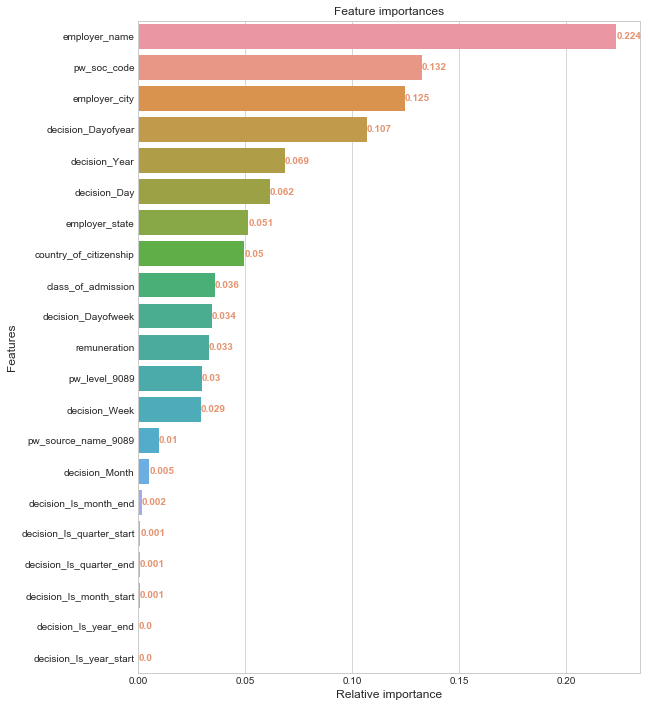

In [73]:
from helper import plot_feat_imp

plot_feat_imp(final_clf, X_train, boundary = None)

According to the feature importances returned by Gradient Boosted Decision Trees obtaining a permanent US Visa depends highly on:

- employer_name
- pw_soc_code
- employer_city
- decision_Dayofyear
- decision_Year
- decision_Day
- employer_state
- country_of_citizenship

Training the final classifier on the whole dataset increased training time, testing accuracy to 94.2% and AUC to nearly 86%. This result is not satisfying, we could try improving it by dividing the whole dataset in such a way that it contains an identical number of Certified and Denied aplications since it is possible to build a good Machine Learning model having only few thousands of observations. Proceeding that way would possibly leave us having more features hence bring us closer to achieving more accurate predictions. 